In [11]:
from __future__ import print_function, division, absolute_import
import os
import sys
sys.path.insert(0, "C:\\Users\\Matt\\Desktop\\orbithunter\\")
from orbithunter import *
import numpy as np
import itertools
from math import pi
import time
import matplotlib.pyplot as plt

In [12]:
from orbithunter.gluing import tile_dictionary_ks
td = tile_dictionary_ks()

This notebook details the tools relevant to continuation, namely ```dimension_continuation``` and ```discretization_continuation```.

In [37]:
s = read_h5('C:/Users/Matt/Desktop/gudorf/KS/python/data_and_figures/tiles/streak/final_tile/EquilibriumOrbitKS_L6p39.h5', directory='', basis='field')
w = read_h5('C:/Users/Matt/Desktop/gudorf/KS/python/data_and_figures/tiles/gap/final_tile/AntisymmetricOrbitKS_T17p150_L17p591.h5', directory='', basis='field')
m = read_h5('C:/Users/Matt/Desktop/gudorf/KS/python/data_and_figures/tiles/defects/defect1/final_tile/RelativeOrbitKS_T15p855_L13p026.h5', directory='', basis='field')

In [14]:
m = read_h5('RelativeOrbitKS_T15p855_L13p026.h5', directory='../data/tiles/original/').reshape(64, 64)
shift = m.S

In [38]:
m = read_h5('RelativeOrbitKS_T15p855_L13p026.h5', directory='../data/tiles/original/')#.reshape(64, 64)

m = read_h5('C:/Users/Matt/Desktop/gudorf/KS/python/data_and_figures/tiles/defects/defect1/final_tile/RelativeOrbitKS_T15p855_L13p026.h5',
            directory='', basis='field')
m = discretization_continuation(m, (32, 32), method='lstsq').orbit
m = dimension_continuation(m, w.T, axis=0, step_size=0.1, method='lstsq').orbit

In [39]:
new_max = m.convert(to='field').state.max()

convert_class(s.reshape(256,256), OrbitKS).reshape(256,256).rescale(new_max).to_h5('OrbitKS_streak.h5', directory='../data/tiles/processed/')
convert_class(m.reshape(256,256), OrbitKS).reshape(256,256).rescale(new_max).to_h5('OrbitKS_merger_comoving.h5', directory='../data/tiles/processed/')
(convert_class(m.reshape(256,256).reshape(256,256).rescale(new_max).change_reference_frame(to='physical'), OrbitKS)
).convert(to='field').to_h5('OrbitKS_merger.h5', directory='../data/tiles/processed/')
convert_class(w.reshape(256,256), OrbitKS).reshape(256,256).rescale(new_max).to_h5('OrbitKS_wiggle.h5', directory='../data/tiles/processed/')

In [40]:
s = dimension_continuation(s, 12, axis=1, method='lstsq').orbit

In [41]:
s = convert_class(s.rescale(new_max).reshape(256, 256).convert(to='field'), OrbitKS)
mf = convert_class(m.reshape(256, 256).convert(to='field').change_reference_frame(to='physical'), OrbitKS)
m = convert_class(m.reshape(256, 256).convert(to='field'), OrbitKS)
w = convert_class(w.rescale(new_max).reshape(256, 256).convert(to='field'), OrbitKS)

In [42]:
m.to_h5('OrbitKS_merger_comoving.h5', directory='../data/tiles/default/')
mf.to_h5('OrbitKS_merger.h5', directory='../data/tiles/default/')
s.to_h5('OrbitKS_streak.h5', directory='../data/tiles/default/')
w.to_h5('OrbitKS_wiggle.h5', directory='../data/tiles/default/')

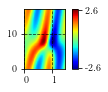

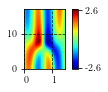

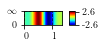

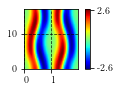

(OrbitKS({"basis": "field", "parameters": ["17.1508", "13.0196", "0"], "field_shape": ["256", "256"]}),
 OrbitKS({"basis": "field", "parameters": ["17.1508", "13.0196", "0"], "field_shape": ["256", "256"]}),
 OrbitKS({"basis": "field", "parameters": ["0.0", "12.0", "0"], "field_shape": ["256", "256"]}),
 OrbitKS({"basis": "field", "parameters": ["17.1508", "17.5911", "0"], "field_shape": ["256", "256"]}))

In [44]:
m.plot(), mf.plot(), s.plot(), w.plot()
m, mf, s, w

In [45]:
def pad_space(state, pad):
    return np.concatenate((np.zeros([state.shape[0], pad]), state, np.zeros([state.shape[0], pad])),axis=1)

In [ ]:
# unpadded_s = s.convert(to='field').state
# unpadded_m = m.convert(to='field').state
# unpadded_mf = m.convert(to='field').change_reference_frame(to='physical').state
# unpadded_w = w.convert(to='field').state

# sfinal = OrbitKS(state=s.state, basis='field', parameters=s.parameters)
# mfinal = OrbitKS(state=m.state, basis='field', parameters=m.parameters)
# mffinal = OrbitKS(state=mf.state, basis='field', parameters=m.parameters)
# wfinal = OrbitKS(state=w.state, basis='field', parameters=w.parameters)

# sfinal.to_h5('OrbitKS_streak.h5', directory='../data/tiles/continuation/')
# mffinal.to_h5('OrbitKS_merger.h5', directory='../data/tiles/continuation/')
# mfinal.to_h5('OrbitKS_merger_comoving.h5', directory='../data/tiles/continuation/')
# wfinal.to_h5('OrbitKS_wiggle.h5', directory='../data/tiles/continuation/')

In [48]:
s_space_padded = OrbitKS(state=pad_space(s.reshape(256, 176).state, 40), basis='field', parameters=s.parameters)
m_space_padded = OrbitKS(state=pad_space(m.reshape(256, 192).state, 64), basis='field', parameters=m.parameters)
mf_space_padded = OrbitKS(state=pad_space(mf.reshape(256, 192).state, 64), basis='field', parameters=m.parameters)
w_space_padded = OrbitKS(state=w.reshape(256, 256).state, basis='field', parameters=w.parameters)

In [49]:
s_space_padded.to_h5('OrbitKS_streak.h5', directory='../data/tiles/padded_space/')
mf_space_padded.to_h5('OrbitKS_merger.h5', directory='../data/tiles/padded_space/')
m_space_padded.to_h5('OrbitKS_merger_comoving.h5', directory='../data/tiles/padded_space/')
w_space_padded.to_h5('OrbitKS_wiggle.h5', directory='../data/tiles/padded_space/')

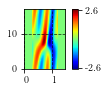

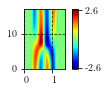

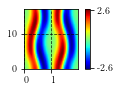

In [50]:
m_space_padded.plot()

mf_space_padded.plot()

w_space_padded.plot()

In [52]:
unpadded_time_all_padded_space_s = s.reshape(256, 152).convert(to='field').state
unpadded_time_all_padded_space_m = m.reshape(256, 168).convert(to='field').state
unpadded_time_all_padded_space_mfd = mf.reshape(256, 168).convert(to='field').state
unpadded_time_all_padded_space_w = w.reshape(256, 224).convert(to='field').state

In [53]:
space_s= OrbitKS(state=pad_space(unpadded_time_all_padded_space_s, 256-152), parameters=s.parameters, basis='field')
space_m= OrbitKS(state=pad_space(unpadded_time_all_padded_space_m, 256-168), parameters=m.parameters, basis='field')
space_mf= OrbitKS(state=pad_space(unpadded_time_all_padded_space_mfd, 256-168),
                  parameters=m.parameters, basis='field')
space_w = OrbitKS(state=pad_space(unpadded_time_all_padded_space_w, 256-224), parameters=w.parameters, basis='field')

In [54]:
space_s.to_h5('OrbitKS_streak.h5', directory='../data/tiles/all_padded_space/')
space_mf.to_h5('OrbitKS_merger.h5', directory='../data/tiles/all_padded_space/')
space_m.to_h5('OrbitKS_merger_comoving.h5', directory='../data/tiles/all_padded_space/')
space_w.to_h5('OrbitKS_wiggle.h5', directory='../data/tiles/all_padded_space/')

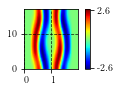

In [55]:
space_w.plot()

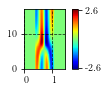

In [56]:
space_mf.plot()

In [57]:
def pad_time(state, pad):
    return np.concatenate((np.zeros([pad, state.shape[1]]), state, np.zeros([pad, state.shape[1]])),axis=0)

In [61]:
padded_s = pad_space(pad_time(s.reshape(224, 152).convert(to='field').state, 16), (256-152)//2)
padded_m = pad_space(pad_time(m.reshape(224, 168).convert(to='field').state, 16), (256-168)//2)
padded_mfd = pad_space(pad_time(mf.reshape(224, 168).convert(to='field').state, 16), (256-168)//2)
padded_w = pad_space(pad_time(w.reshape(224, 224).convert(to='field').state, 16), (256-224)//2)

In [62]:
padded_s_orbit= OrbitKS(state=padded_s, basis='field', parameters=s.parameters)
padded_m_orbit= OrbitKS(state=padded_m, basis='field', parameters=m.parameters)
padded_w_orbit = OrbitKS(state=padded_w, basis='field', parameters=w.parameters)
padded_mfd_orbit = OrbitKS(state=padded_mfd, basis='field', parameters=m.parameters)

In [63]:
padded_s_orbit,padded_m_orbit,padded_w_orbit,padded_mfd_orbit

(OrbitKS({"basis": "field", "parameters": ["0.0", "12.0", "0"], "field_shape": ["256", "256"]}),
 OrbitKS({"basis": "field", "parameters": ["17.1508", "13.0196", "0"], "field_shape": ["256", "256"]}),
 OrbitKS({"basis": "field", "parameters": ["17.1508", "17.5911", "0"], "field_shape": ["256", "256"]}),
 OrbitKS({"basis": "field", "parameters": ["17.1508", "13.0196", "0"], "field_shape": ["256", "256"]}))

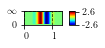

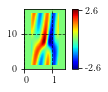

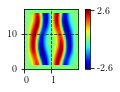

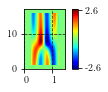

In [64]:
for o in [padded_s_orbit,padded_m_orbit,padded_w_orbit,padded_mfd_orbit]:
    o.plot()

In [65]:
padded_s_orbit.to_h5('OrbitKS_streak.h5', directory='../data/tiles/padded/')
padded_mfd_orbit.to_h5('OrbitKS_merger.h5', directory='../data/tiles/padded/')
padded_m_orbit.to_h5('OrbitKS_merger_comoving.h5', directory='../data/tiles/padded/')
padded_w_orbit.to_h5('OrbitKS_wiggle.h5', directory='../data/tiles/padded/')